In [114]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

# Exercises

In [49]:
sf_temps = data.sf_temps()

In [50]:
# custom plotting settings
title_font = {'family': 'Rockwell',
            'color':  '#1f1e1e',
            'weight': 'bold',
            'size': 20,
            }
axes_fonts = {'family': 'Rockwell',
            'color':  '#1f1e1e',
            'weight': 'bold',
            'size': 20,
            }
favorite_palettes = ['gray_r','RdGy','binary'
                     ,'bone_r','gist_gray_r','gist_yarg','hsv','icefire'
                     ,'icefire_r','rainbow_r','winter_r','Accent','CMRmap_r',]

### Part I:
#### Use the above dataset for the following exercises:


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [51]:
sf_temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [52]:
sf_temps = sf_temps.set_index('date')

In [56]:
sf_temps_average_temperature = sf_temps.resample('D').mean()
data=sf_temps_average_temperature

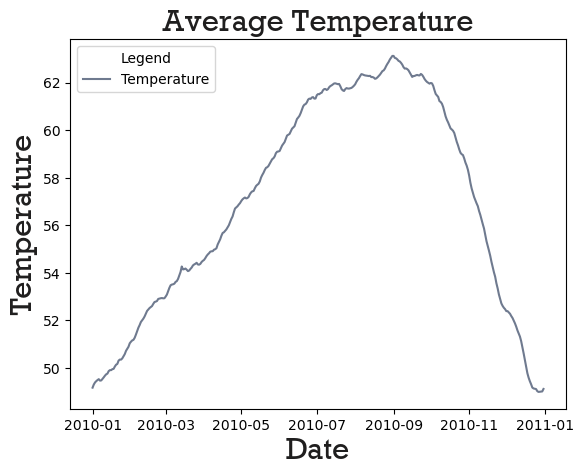

In [57]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)
ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Average Temperature",fontdict=title_font)
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.


In [63]:
sf_temps_minimum_temperature = sf_temps.resample('D').min()
data=sf_temps_minimum_temperature

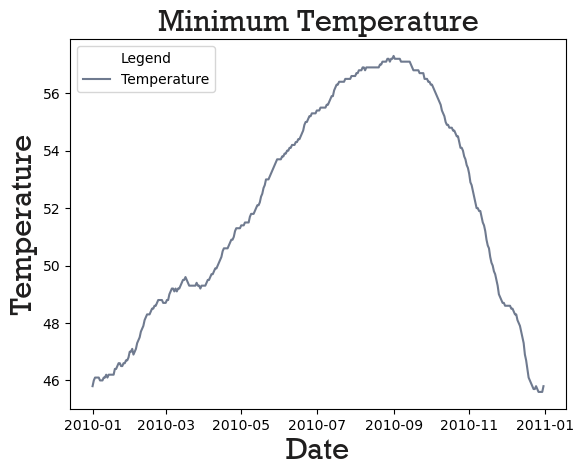

In [64]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Minimum Temperature",fontdict=title_font)
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.


In [62]:
sf_temps_maximum_temperature = sf_temps.resample('D').max()
data=sf_temps_minimum_temperature

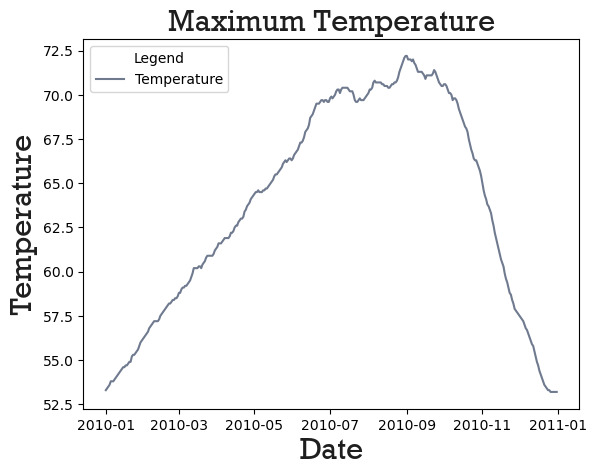

In [61]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Maximum Temperature",fontdict=title_font)
plt.show()

#### 4. Which month is the coldest, on average?


In [65]:
sf_temps_coldest_month_temperature = sf_temps.resample('M').max()
data=sf_temps_coldest_month_temperature

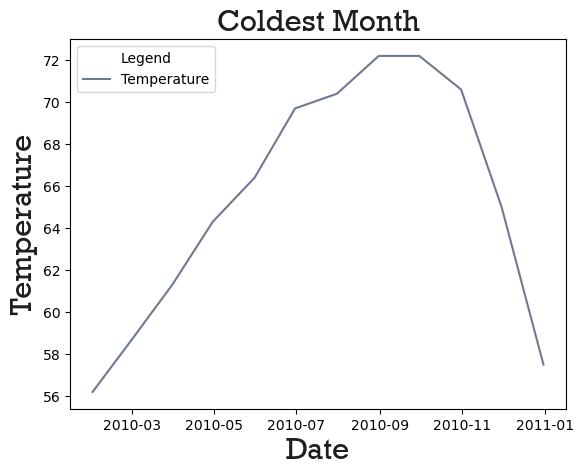

In [67]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Coldest Month",fontdict=title_font)
plt.show()

#### 5. Which month has the highest average temperature?


In [93]:
sf_temps_coldest_average_month_temperature = sf_temps.resample('M').mean()
data=sf_temps_coldest_average_month_temperature

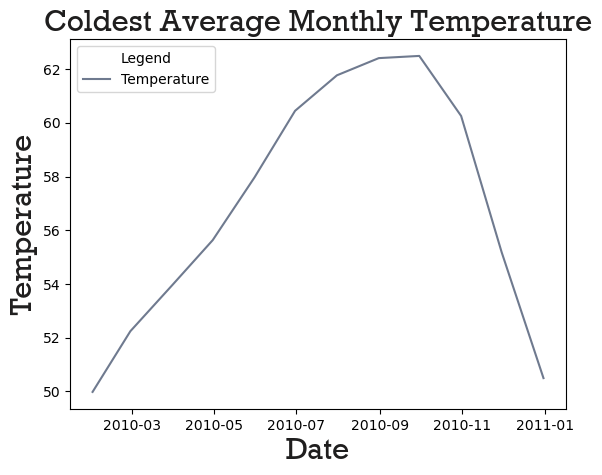

In [94]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Coldest Average Monthly Temperature",fontdict=title_font)
plt.show()

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [96]:
sf_temps_daily_variance = sf_temps.resample('D').min()
data=sf_temps_daily_variance

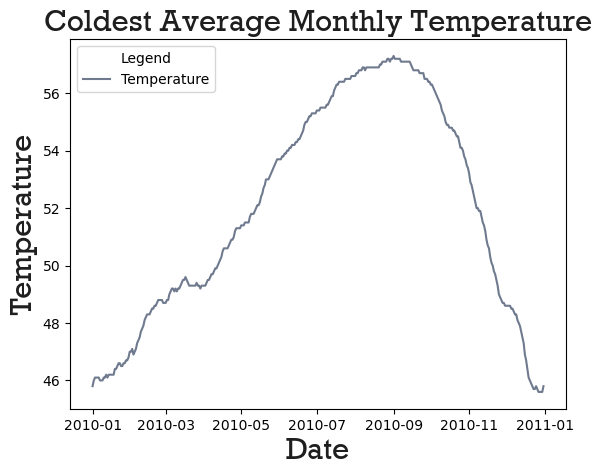

In [97]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Coldest Average Monthly Temperature",fontdict=title_font)
plt.show()

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [109]:
seattle_weather_df = data.seattle_weather()

### Part II:
#### Use the above dataset for the following exercises:

#### 1. Which year and month combination has the highest amount of precipitation?

In [115]:
# Convert the date column to a datetime object
seattle_weather_df['date'] = pd.to_datetime(seattle_weather_df['date'])

In [122]:
seattle_weather_df.head(1)

,date,precipitation,temp_max,temp_min,wind,weather,year_month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01


In [119]:
# Extract the year and month from the date column
seattle_weather_df['year_month'] = seattle_weather_df['date'].dt.to_period("M")

In [121]:
seattle_weather_df.head(1)

,date,precipitation,temp_max,temp_min,wind,weather,year_month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01


In [124]:
# Group the DataFrame by the year and month
grouped = seattle_weather_df.groupby('year_month').sum()

In [126]:
grouped.head(3)

,precipitation,temp_max,temp_min,wind
year_month,,,,
2012-01,173.3,218.7,47.8,120.9
2012-02,92.3,269.0,92.9,113.2
2012-03,183.0,296.2,88.0,131.7


In [127]:
# Find the year and month with the highest precipitation
max_precipitation = grouped['precipitation'].idxmax()

In [128]:
max_precipitation

Period('2015-12', 'M')

#### 2. Visualize the amount of monthly precipitation over time.

In [133]:
ax = sns.lineplot(data = grouped.reset_index(), x = 'index',y="precipitation",palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Coldest Average Monthly Temperature",fontdict=title_font)
plt.show()

ValueError: Could not interpret value `index` for parameter `x`

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [134]:
flights_20k_df = data.flights_20k()

### Part III:
#### Use the above dataset for the following exercises:

Convert any negative delays to 0.

Which hour of the day has the highest average delay?

Does the day of the week make a difference in the delay amount?

Does the month make a difference in the delay amount?

In [135]:
iowa_electricity_df = data.iowa_electricity()

### BONUS
### Part I.
#### Use the above dataset for the following exercises:

#### 1. For each row, calculate the percentage of the year's total that energy source provided.

#### 1. Lineplot of generation over time, color by source

#### 1. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

#### 1. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

#### 1. Is the total generation increasing over time?

####    a. How would you control for increasing consumption over time when considering how much energy is coming from each source?

####    b. express each number as a % of the year's total

### Part III:
#### Explore the birdstrikes dataset